# Import of scripts

In [305]:
import pandas as pd
import numpy as np
import scipy

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Load billede
**Step 1:** load et billede  \
**Step 2:** visualiser billedet \
**Step 3:** Print højde og længde på billedet

<PIL.PngImagePlugin.PngImageFile image mode=L size=299x299 at 0x2F0E045DA20>


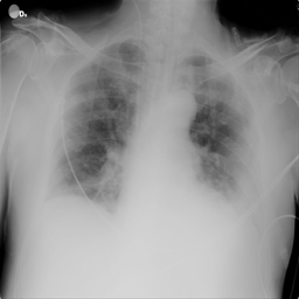

In [306]:
from PIL import Image
image = Image.open('COVID-1.png')
print(image)

# draw the image
image


In [307]:
# get image height and width
height, width = image.size
print("image height is %i and image width is %i " % (height, width))

image height is 299 and image width is 299 


# Korrelationer og visualisering af data
Ikke et big data - datasæt, 
men et datasæt som viser nuancer af alt det der er vigtigt

In [308]:
df_redwine = pd.read_csv('winequality-red.csv')
print(df_redwine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [309]:
print(df_redwine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [310]:
print(df_redwine["quality"].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


C:\Users\kingo\AppData\Local\Temp\ipykernel_31972\4182189635.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


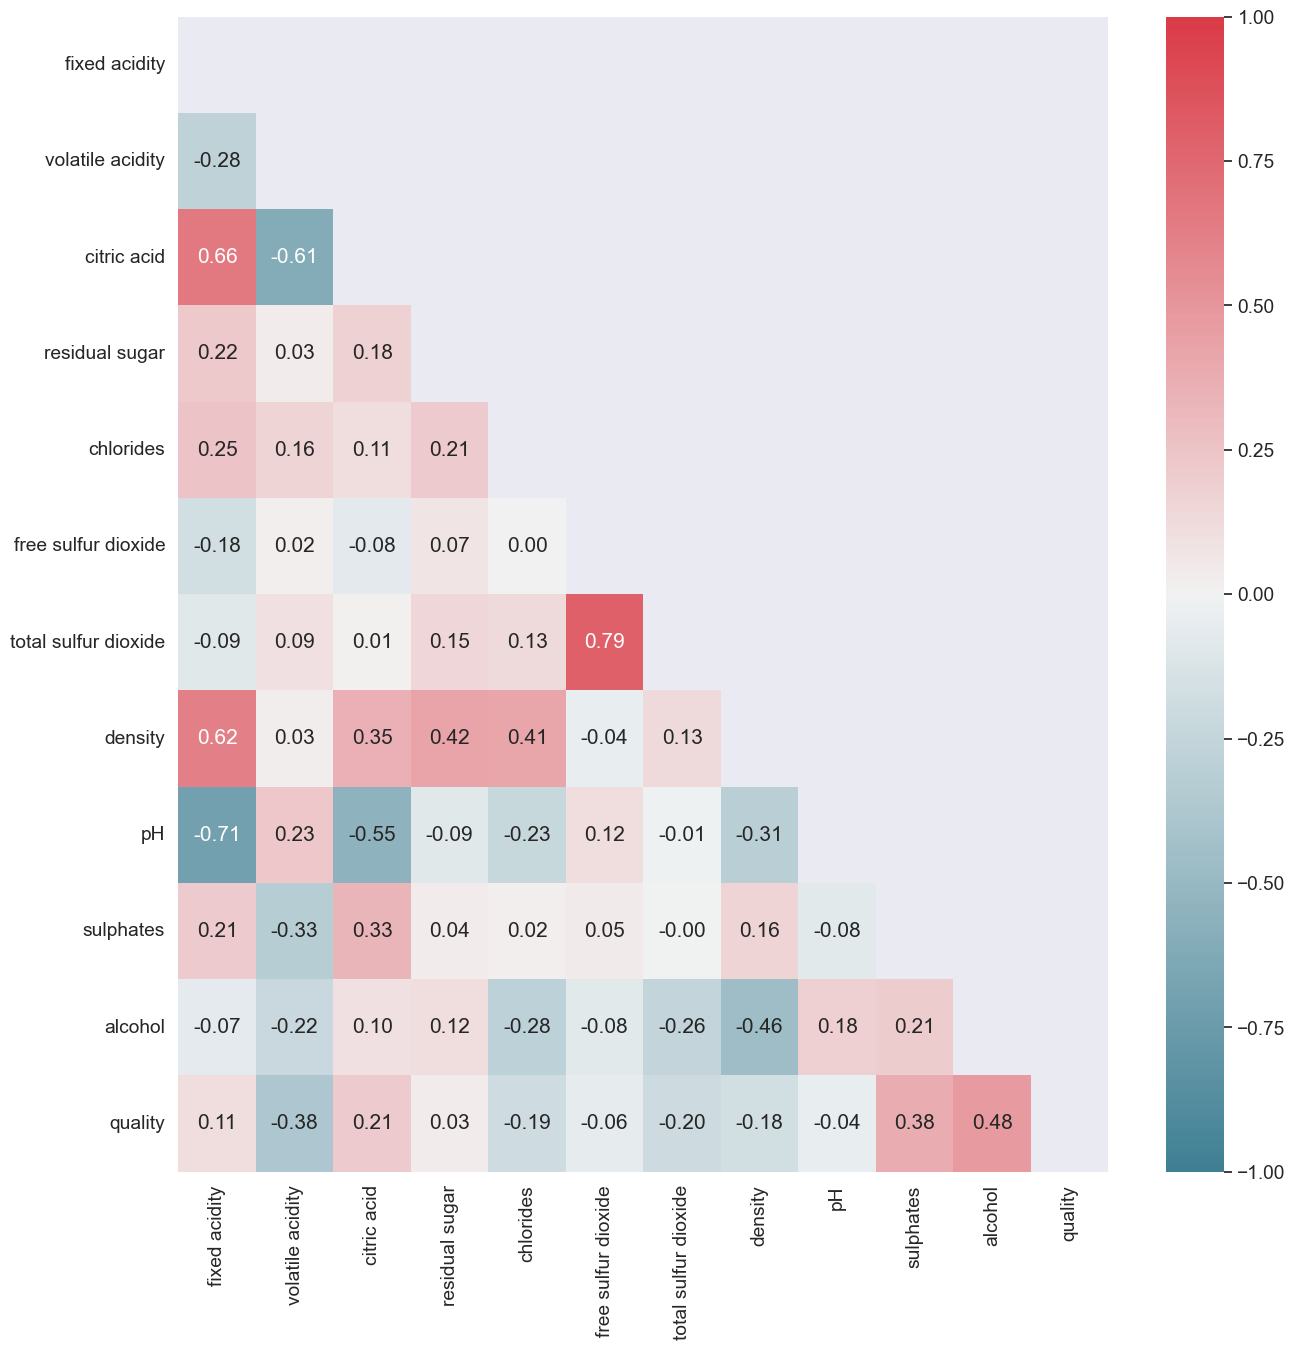

In [311]:
def heatmap(df, fig_size=15):
    # Create a heatmap
    corr = df.corr(method="spearman")
    # Generate a mask for the upper triangle (dubplicates)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # set font size and scale for heatmap depending on number of features
    sns.set(font_scale=fig_size / len(corr.columns))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    #set up the matplotlib figure
    plot, ax = plt.subplots(figsize=(fig_size, fig_size))
    
    # draw the heatmap 
    sns.heatmap(corr, vmin=-1, vmax=1, mask=mask, cmap=cmap, annot=True, fmt=".2f")
    # shift ticks to be in the middle of the column / row
    # for axis in [ax.xaxis, ax.yaxis]:
    #     axis.set(ticks=np.arange(len(corr.columns)), ticklabels=corr.columns)
    
    
    return plt

plot = heatmap(df_redwine)

# Forskellige plots
visualiser jeres data med forskellige plots 
- hvad fortæller de jer?

In [312]:
from scipy.stats import spearmanr

correlation = spearmanr(a=df_redwine["alcohol"], b=df_redwine["density"])
dataset = ["alcohol","density","pH","chlorides","sulphates","citric acid"]
for data in dataset:
    correlation = spearmanr(a=df_redwine["quality"], b=df_redwine[data])
    print(correlation)

SpearmanrResult(correlation=0.4785316874702435, pvalue=2.7268377398472646e-92)
SpearmanrResult(correlation=-0.17707406597199962, pvalue=9.918139164678968e-13)
SpearmanrResult(correlation=-0.043671934788928383, pvalue=0.0808459436470526)
SpearmanrResult(correlation=-0.1899223356173072, pvalue=1.8828578369578738e-14)
SpearmanrResult(correlation=0.37706019910212196, pvalue=3.477695182639494e-55)
SpearmanrResult(correlation=0.2134809144221363, pvalue=6.158952285215761e-18)


In [313]:
for column in df_redwine.columns:
    correlation = spearmanr(a=df_redwine["quality"], b=df_redwine[column])
    print(correlation)

SpearmanrResult(correlation=0.11408367358880324, pvalue=4.8012196391814265e-06)
SpearmanrResult(correlation=-0.3806465104253755, pvalue=2.7349440224655985e-56)
SpearmanrResult(correlation=0.2134809144221363, pvalue=6.158952285215761e-18)
SpearmanrResult(correlation=0.032048167529057335, pvalue=0.20024535327856613)
SpearmanrResult(correlation=-0.1899223356173072, pvalue=1.8828578369578738e-14)
SpearmanrResult(correlation=-0.0569006455015393, pvalue=0.022883222776915322)
SpearmanrResult(correlation=-0.1967350754412208, pvalue=2.046487847598195e-15)
SpearmanrResult(correlation=-0.17707406597199962, pvalue=9.918139164678968e-13)
SpearmanrResult(correlation=-0.043671934788928383, pvalue=0.0808459436470526)
SpearmanrResult(correlation=0.37706019910212196, pvalue=3.477695182639494e-55)
SpearmanrResult(correlation=0.4785316874702435, pvalue=2.7268377398472646e-92)
SpearmanrResult(correlation=1.0, pvalue=0.0)


In [314]:
correlation = spearmanr(a=df_redwine["alcohol"], b=df_redwine["residual sugar"])
print(correlation)

highestCorrelation = 0
highestCorrelationCol = ""
for col in df_redwine.columns:
    if col != "alcohol":
        correlation = spearmanr(a=df_redwine["alcohol"], b=df_redwine[col])

        print("Correlation between alcohol and %s is %f" % (col, correlation.correlation))

        if correlation.correlation > highestCorrelation:
            highestCorrelation = correlation.correlation
            highestCorrelationCol = col

print("Highest correlation is %f with feature %s" % (highestCorrelation, highestCorrelationCol))

SpearmanrResult(correlation=0.11654813117003865, pvalue=2.9718502914568935e-06)
Correlation between alcohol and fixed acidity is -0.066576
Correlation between alcohol and volatile acidity is -0.224932
Correlation between alcohol and citric acid is 0.096456
Correlation between alcohol and residual sugar is 0.116548
Correlation between alcohol and chlorides is -0.284504
Correlation between alcohol and free sulfur dioxide is -0.081367
Correlation between alcohol and total sulfur dioxide is -0.257806
Correlation between alcohol and density is -0.462445
Correlation between alcohol and pH is 0.179932
Correlation between alcohol and sulphates is 0.207330
Correlation between alcohol and quality is 0.478532
Highest correlation is 0.478532 with feature quality


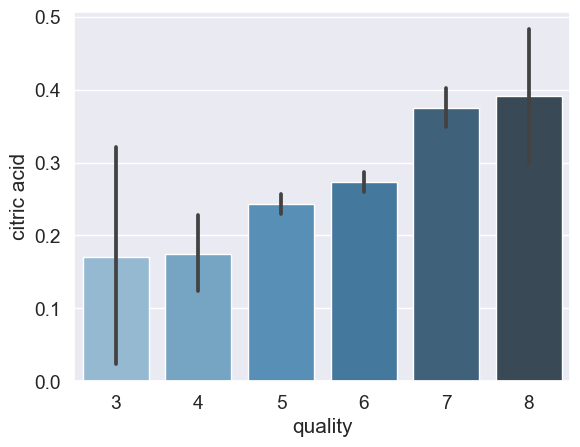

In [315]:
# bar plot
img = sns.barplot(x="quality", y="citric acid", data=df_redwine, palette='Blues_d')

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

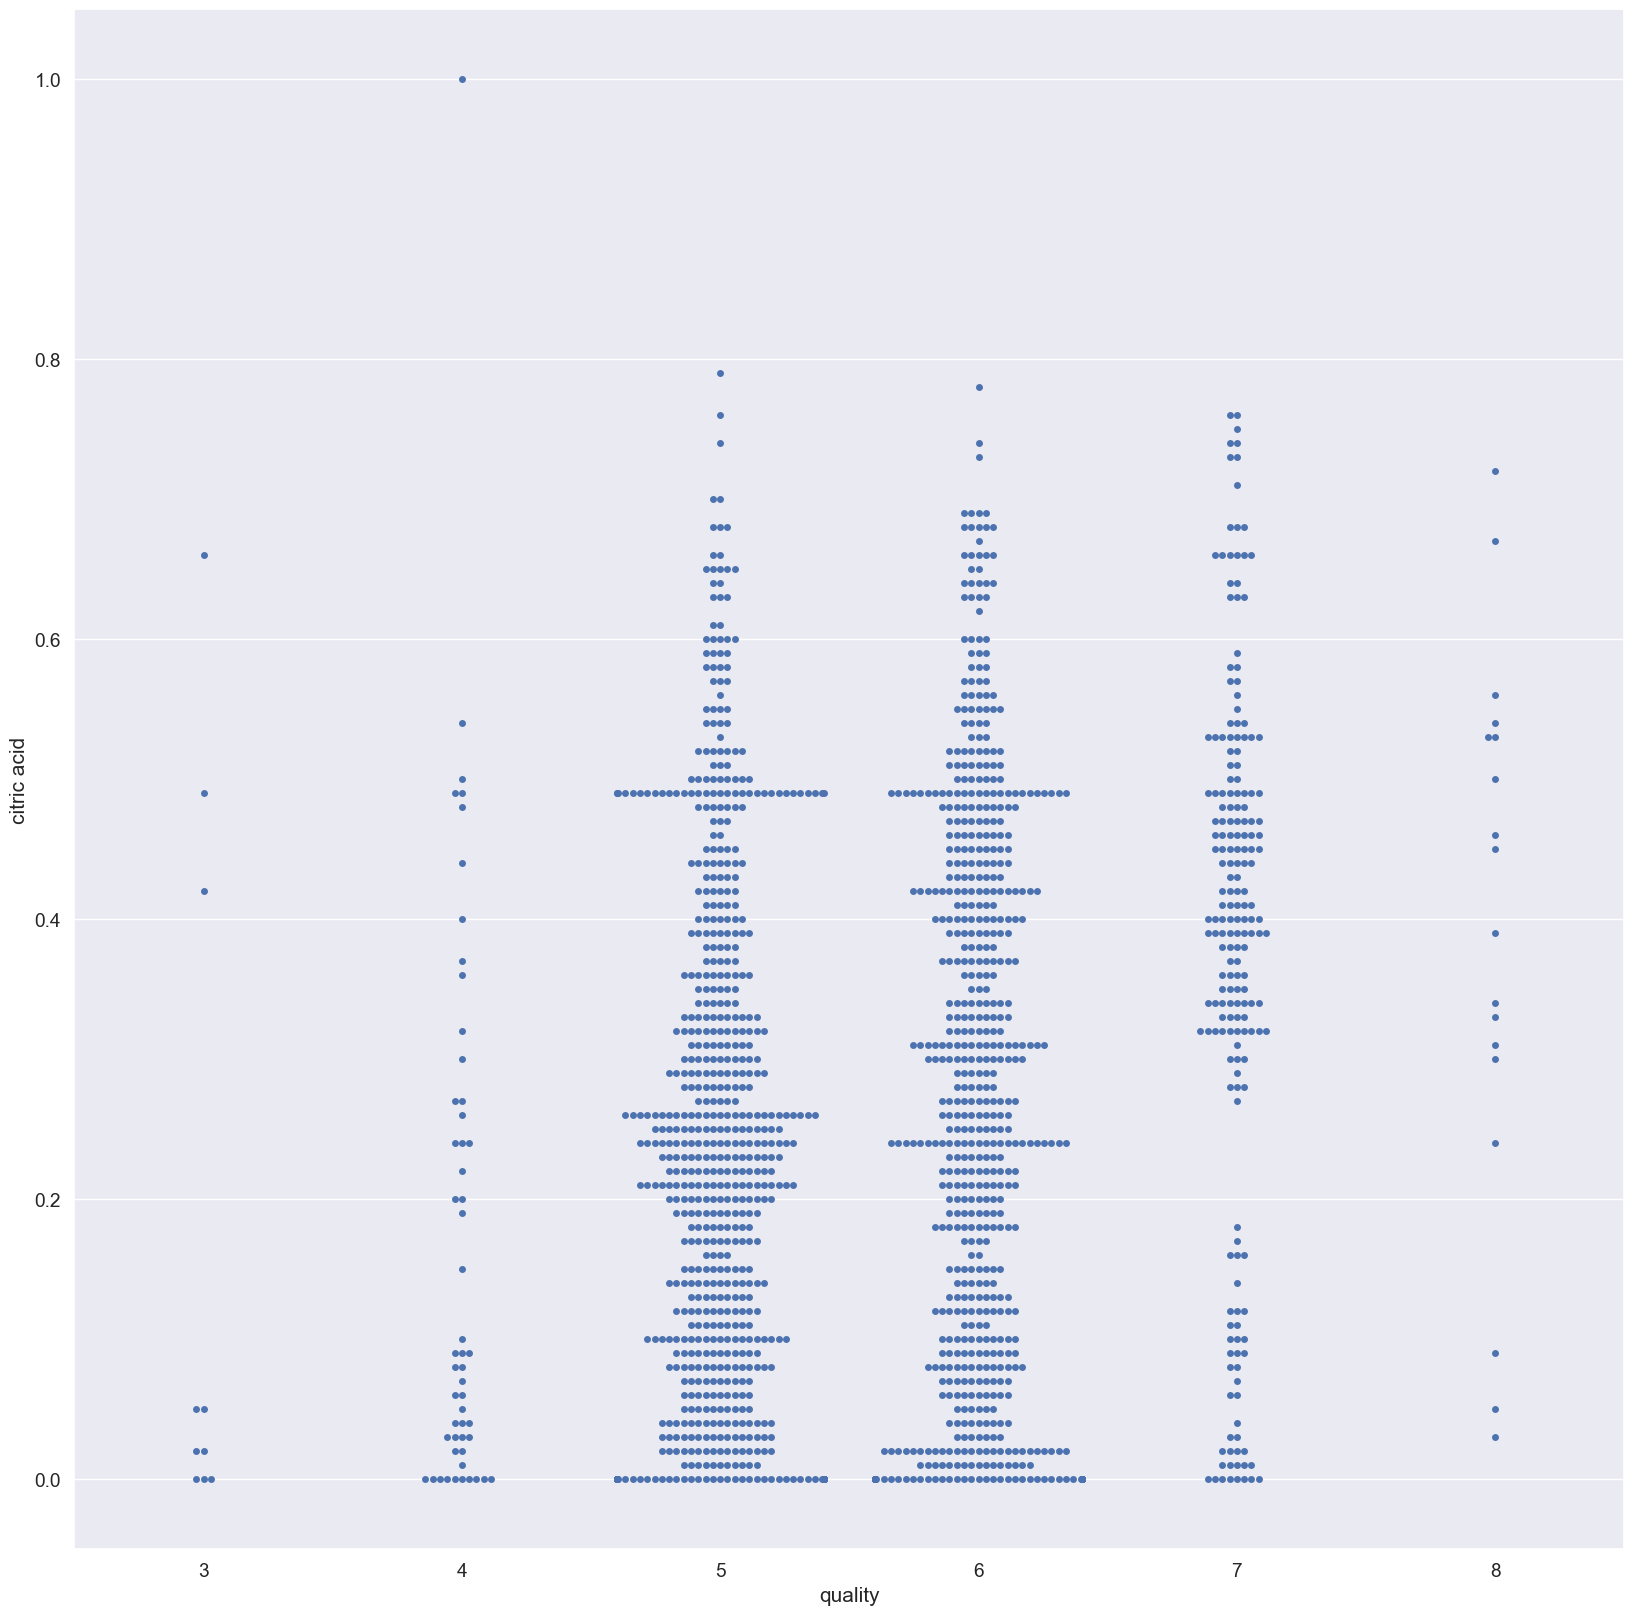

In [316]:
# strip plot
fig, ax = plt.subplots(figsize=(20,20))
sns.swarmplot(x='quality', y='citric acid', data=df_redwine, size=5)


<AxesSubplot: xlabel='quality', ylabel='citric acid'>

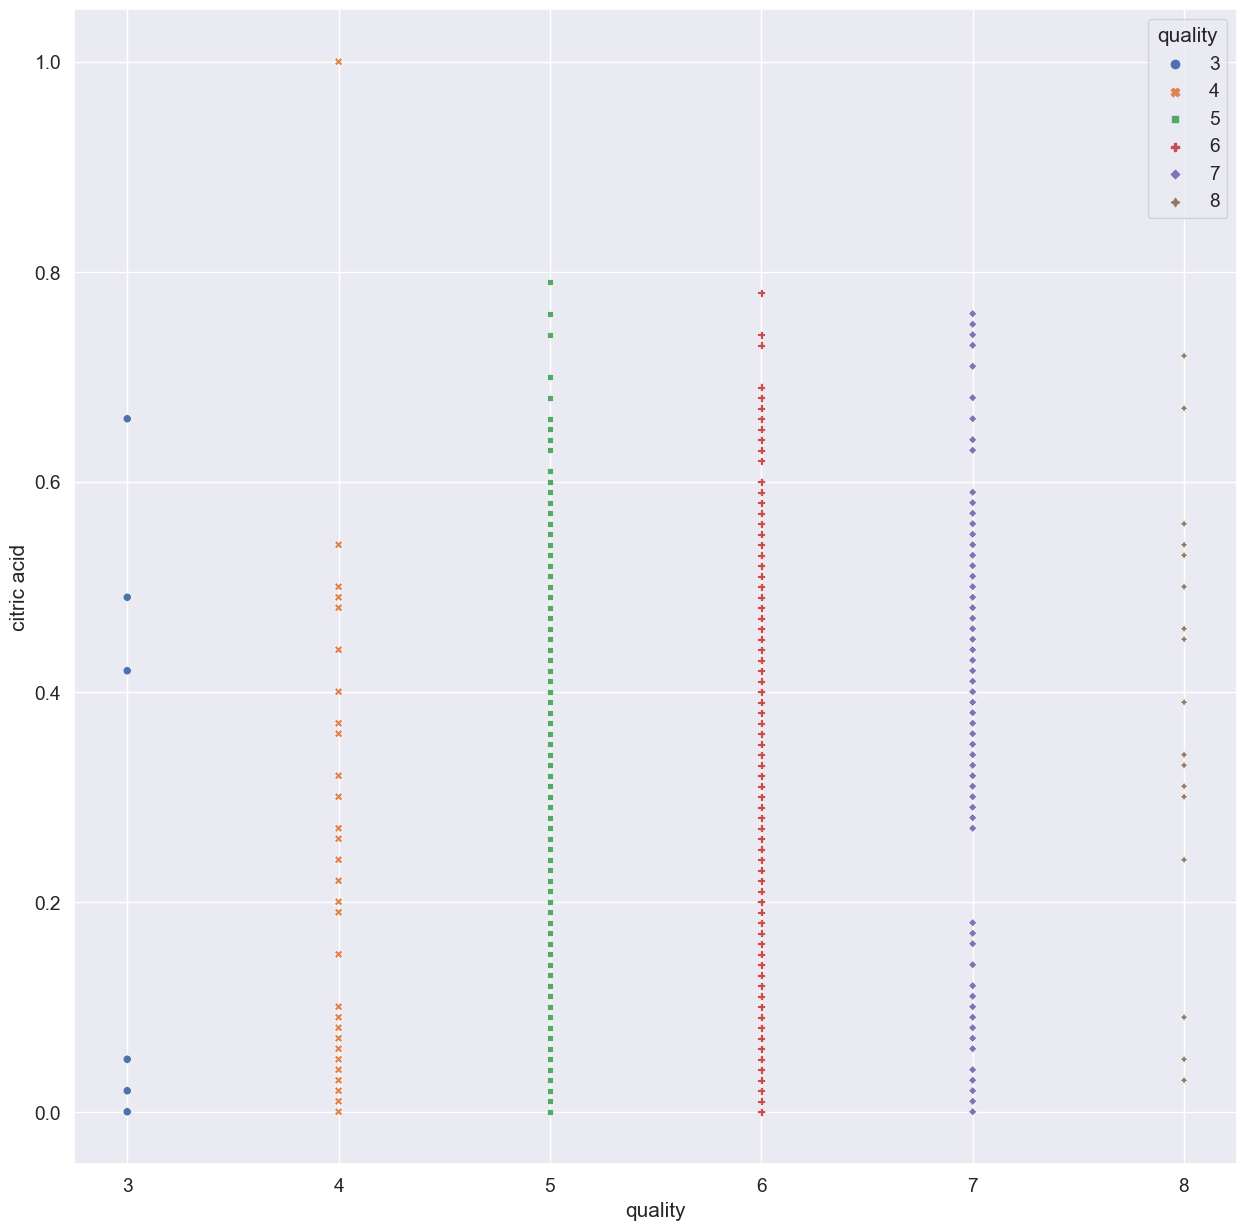

In [317]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(data=df_redwine, 
                x="quality", 
                y="citric acid", 
                hue="quality", 
                palette="deep", 
                style="quality")

# Anomaly Påvisning
Vælg en af de forskellige anomalier, og se hvad der sker med datasættet, når anomalier er fjernet.

1. Trimmet Mean
2. Z score
3. IQR
4. IsolationForest

Trimmet gennemsnit

In [318]:
print("normal average")
print(df_redwine.mean())

print("Trimmed average")
print(scipy.stats.trim_mean(a=df_redwine, proportiontocut=0.1))

normal average
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64
Trimmed average
[ 8.15253708  0.51806792  0.26128806  2.25835285  0.08023497 14.57728337
 41.84309133  0.99673621  3.30909446  0.63744731 10.31003123  5.58860265]


Z Score

In [319]:
# Z score method
from scipy import stats

threshold = 3

z = np.abs(stats.zscore(df_redwine))
df_z = df_redwine[(z < threshold).all(axis=1)]
print(df_z.shape)
print(df_redwine.shape)

(1451, 12)
(1599, 12)


<AxesSubplot: xlabel='quality', ylabel='citric acid'>

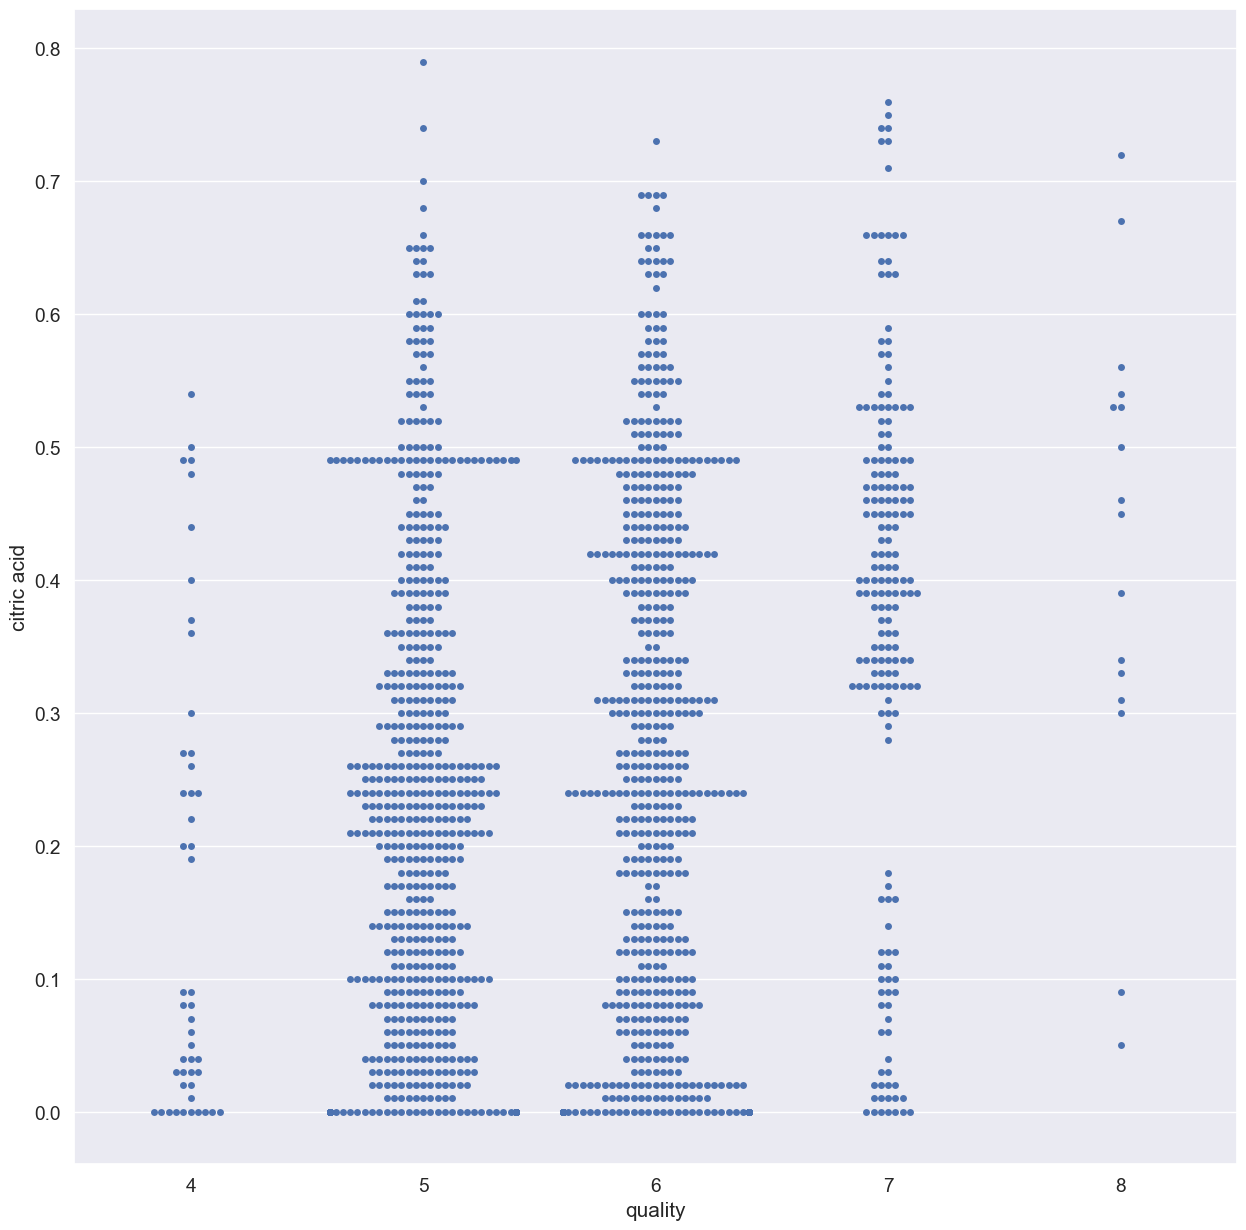

In [320]:
fig, ax = plot.subplots(figsize=(15, 15))
sns.swarmplot(x='quality', y='citric acid', data=df_z, size=5)

# MIN / MAX scaler

In [321]:
from sklearn.preprocessing import MinMaxScaler

x = np.array(df_redwine.loc[:, df_redwine.columns != 'quality'])
y = np.array(df_redwine.loc[:, df_redwine.columns == 'quality'])

x = MinMaxScaler().fit_transform(x)

threshold=3

z = np.abs(stats.zscore(x))
df_z = x[(z < threshold).all(axis=1)]
print(x.shape)


(1599, 11)


# IQR - inter quartile range

In [322]:
Q1 = df_redwine.quantile(0.25)
Q3 = df_redwine.quantile(0.75)

IQR = Q3 - Q1

iqr_df = df_redwine[~((df_redwine < (Q1 - 1.5 * IQR)) | (df_redwine > (Q3 + 1.5 * IQR))).any(axis=1)]
print(iqr_df.shape)

(1179, 12)


c:\Program Files\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Program Files\Python310\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 14.2% of t

<AxesSubplot: xlabel='residual sugar', ylabel='alcohol'>

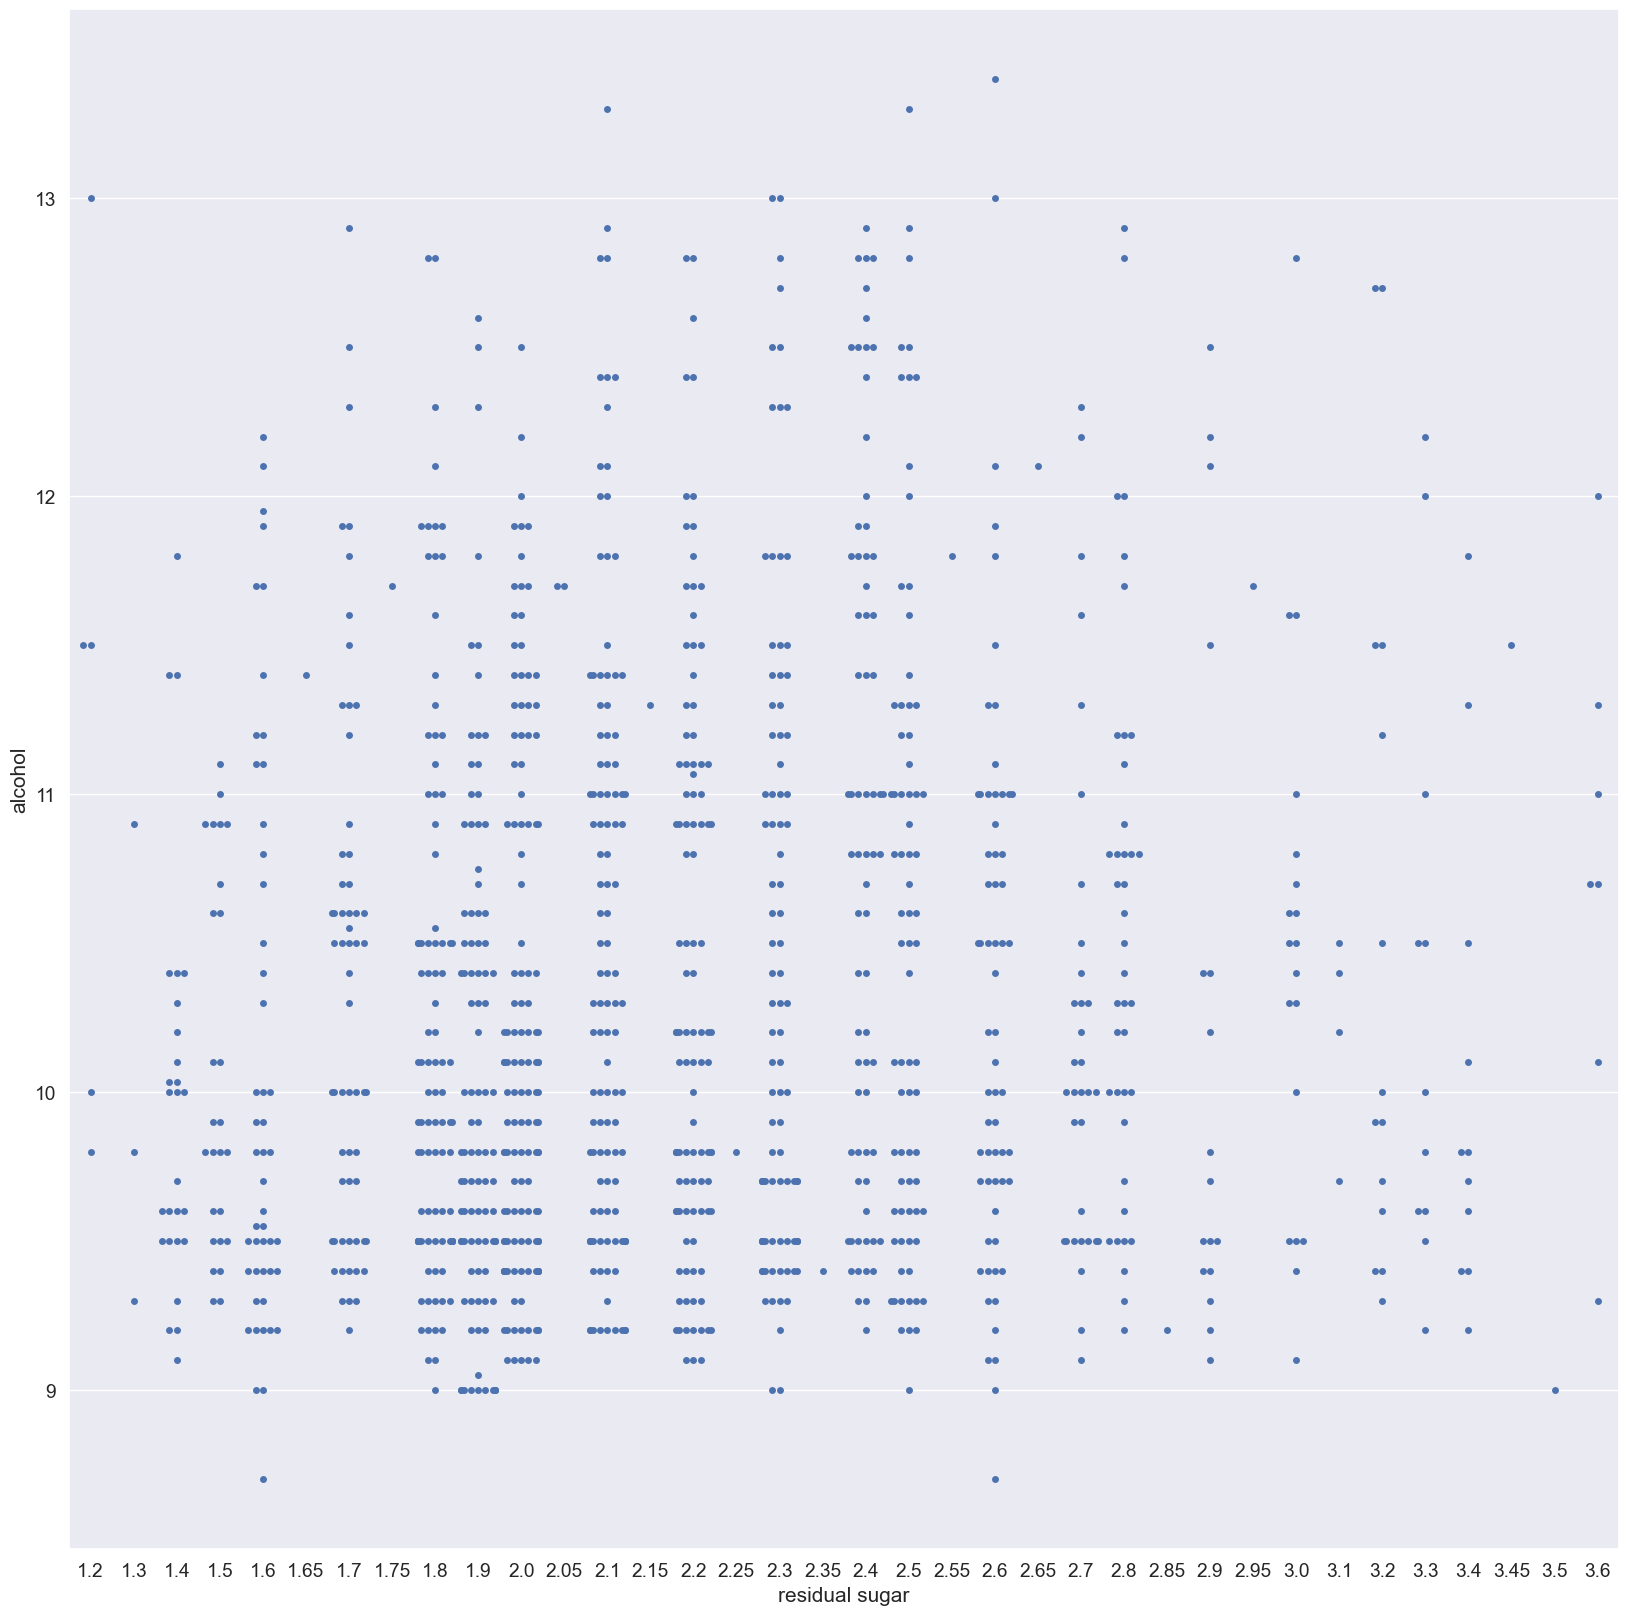

In [323]:
fix, ax = plt.subplots(figsize=(20,20))
sns.swarmplot(x='residual sugar', y='alcohol', data=iqr_df, size=5)

Isolation Forest

In [324]:
from sklearn.model_selection import train_test_split;
from sklearn.ensemble import IsolationForest;

x = np.array(df_redwine.loc[:, df_redwine.columns != 'quality']);
y = np.array(df_redwine.loc[:, df_redwine.columns == 'quality']);

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2);

print("x train shape", x_train.shape);
print("x test shape", x_test.shape);

x train shape (1279, 11)
x test shape (320, 11)


In [325]:
scaler = MinMaxScaler().fit(x_train);

x_train_scaled = scaler.transform(x_train);

x_test_scaled = scaler.transform(x_test);

print(x_train_scaled.shape);
print(x_test_scaled.shape);

def remove_anomalies(clf, x, y):
    y_hat = clf.predict(x);

    # get amount of anomalies
    print(list(y_hat).count(-1) / y_hat.shape[0]);
    x, y = x[(y_hat != 1), :], y[(y_hat != -1)];

    return x, y;

clf = IsolationForest().fit(x_train_scaled);

(1279, 11)
(320, 11)


In [326]:
# x_train_iso, y_train_iso = remove_anomalies(clf, x_train_scaled, y_train);

# print(x_train_iso.shape);
# print(y_train_iso.shape);

# x_test_scaled_iso, y_test_scaled_iso = remove_anomalies(clf, x_test_scaled, y_test);
# print(x_test_scaled_iso.shape);

x_train_scaled, y_train = remove_anomalies(clf, x_train_scaled, y_train)
print(x_train.shape)

x_test_scaled_iso, y_test_iso = remove_anomalies(clf, x_test_scaled, y_test)
print(x_test_scaled_iso.shape)

0.09304143862392494
(1279, 11)
0.084375
(27, 11)


# Create ML Model

Try using the raw dataset, 
z-score or iqr dataset, and see what happens with the model performance.

In [327]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, fbeta_score, make_scorer, recall_score, precision_score
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight

In [328]:
# dataframe to use
# raw = df_redwine
# z-score = df_z
# iqr = iqr_df

data_frame = pd.read_csv('winequality-red.csv');

# make binary
# chaning y to binary classification with y < 6.5 == bad, and y > 6.5 == good. zero if bad, one if good
bins = (2, 6.5, 8);
classifiernames = ["bad", "good"];
data_frame["quality"] = pd.cut(data_frame["quality"], bins=bins, labels=classifiernames);

data_frame["quality"] = data_frame.quality.replace({"bad": 0, "good": 1}).astype(float);

x = np.array(data_frame.loc[:, data_frame.columns != 'quality']);
y = np.array(data_frame.loc[:, data_frame.columns == 'quality']);

# split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False);

print(x_train.shape);
print(x_test.shape);

scaler = MinMaxScaler().fit(x_train);

x_train_scaled = scaler.transform(x_train);
x_test_scaled = scaler.transform(x_test);

print(x_train_scaled.shape);
print(x_test_scaled.shape);





(1279, 11)
(320, 11)
(1279, 11)
(320, 11)


# Creating ML model for the computer to take over the workspace

In [329]:
def create_model(x_train, y_train, class_weights=None):
    """ Create the model with the best c value """
    # get the best params
    PARAM_GRID = {
        "C": np.linspace(1, 10, 10),
        "kernel": ["rbf", "poly"],
        "degree": np.linspace(1, 10, 10)
    }

    model = svm.SVC(gamma="scale", class_weight=class_weights);
    scorer = make_scorer(fbeta_score, beta=2, greater_is_better=True);
    model = GridSearchCV(model, param_grid=PARAM_GRID, scoring=scorer, cv=3, verbose=5, n_jobs=3);
    model.fit(x_train, y_train);

    params = model.best_params_;
    print("\n");
    print(params);
    C = params.get("C");
    kernel = params.get("kernel");
    degree = params.get("degree");

    model = svm.SVC(kernel=kernel, degree=degree, C=C, gamma="scale", class_weight=class_weights);

    model.fit(x_train, y_train.ravel());

    return model;

In [330]:
def evaluate_model(model, x, y):
    performance = model.score(x, y);
    print("Score of the model: %f" % performance);

    # predict 
    y_hat = model.predict(x);

    # confusion matrix
    cm = confusion_matrix(y, y_hat);
    print("Confusion Matrix \n tn, fp, fn, tp \n", cm);

    # precision
    precision = precision_score(y_true=y, y_pred=y_hat, pos_label=0);
    print("Precision: %f" % precision);

    # recall
    recall = recall_score(y_true=y, y_pred=y_hat, pos_label=0);
    print("Recall: %f" % recall);

In [331]:
weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train.ravel());

print(weights);

class_weights = { 0: weights[0], 1: weights[1] };
print(class_weights);

weighted_model = create_model(x_train=x_train_scaled, y_train=y_train, class_weights=class_weights);

[0.58831647 3.33072917]
{0: 0.5883164673413064, 1: 3.3307291666666665}
Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'C': 4.0, 'degree': 1.0, 'kernel': 'poly'}


C:\Users\kingo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [334]:
evaluate_model(model=weighted_model, x=x_train_scaled, y=y_train);
print("\n");
evaluate_model(model=weighted_model, x=x_test_scaled, y=y_test);

Score of the model: 0.781079
Confusion Matrix 
 tn, fp, fn, tp 
 [[830 257]
 [ 23 169]]
Precision: 0.973036
Recall: 0.763569


Score of the model: 0.750000
Confusion Matrix 
 tn, fp, fn, tp 
 [[221  74]
 [  6  19]]
Precision: 0.973568
Recall: 0.749153
